In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='sulshawmysql',
    database='ecomm'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/e-comm_proj'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [69]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='sulshawmysql',
    database='ecomm'
)
cursor = db.cursor()

 # List all unique cities where customers are located.

In [4]:
query=''' select distinct (customer_city) from customers'''
cursor.execute(query)
data=cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [12]:
query=''' select count(order_id) from orders where year(order_purchase_timestamp)="2017" '''
cursor.execute(query)
data=cursor.fetchall()
data

[(45101,)]

# Find the total sales per category.

In [54]:
query=''' select products.product_category as category,sum(order_items.price) as total_sale from products join order_items on order_items.product_id=products.product_id
group by products.product_category order by total_sale desc 
'''
cursor.execute(query)
data=cursor.fetchall()



In [55]:
result=pd.DataFrame(data,columns=["category","total_sale"])
result

,category,total_sale
0,HEALTH BEAUTY,1.258681e+06
1,Watches present,1.205006e+06
2,bed table bath,1.036989e+06
3,sport leisure,9.880490e+05
4,computer accessories,9.119543e+05
...,...,...
69,flowers,1.110040e+03
70,House Comfort 2,7.602700e+02
71,cds music dvds,7.300000e+02
72,Fashion Children's Clothing,5.698500e+02


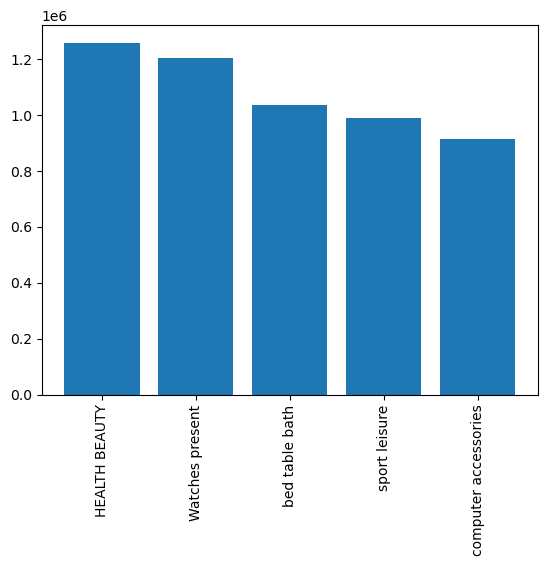

In [57]:
plt.bar(result["category"].head(),result["total_sale"].head())
plt.xticks(rotation="vertical")
plt.show()

# Calculate the percentage of orders that were paid in installments.

In [33]:
query=''' select (sum(case when payment_installments>1 then 1 else 0 end ))/count(*)*100 from payments '''
cursor.execute(query)
data=cursor.fetchall()
data

[(Decimal('49.4176'),)]

# Count the number of customers from each state

In [42]:
query=''' select customer_state,count(customer_id) as total from customers group by customer_state order by total desc'''
cursor.execute(query)
data=cursor.fetchall()


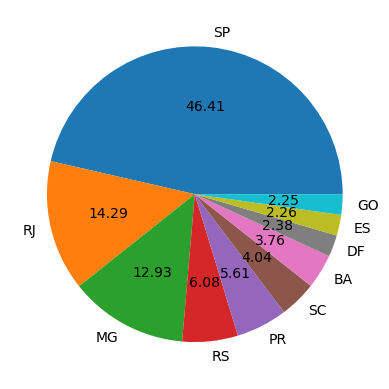

In [53]:
result=pd.DataFrame(data,columns=["state","total_customers"])
plt.pie(result["total_customers"].head(10),labels=result["state"].head(10),autopct="%.2f")
#plt.xticks(rotation="vertical")
plt.show()

# Calculate the number of orders per month in 2018.

In [59]:
 query=''' select count(order_id),monthname(order_purchase_timestamp) as month_2018 from orders where year(order_purchase_timestamp)="2018"
 group by month_2018 '''
cursor.execute(query)
data=cursor.fetchall()
data

[(6292, 'July'),
 (6512, 'August'),
 (6728, 'February'),
 (6167, 'June'),
 (7211, 'March'),
 (7269, 'January'),
 (6873, 'May'),
 (6939, 'April'),
 (16, 'September'),
 (4, 'October')]

# Find the average number of products per order, grouped by customer city.

In [68]:
 query=''' select order_id, count(product_id) as count from order_items group by order_id order by count desc limit 5 '''
 
cursor.execute(query)
data=cursor.fetchall()
data

[('8272b63d03f5f79c56e9e4120aec44ef', 21),
 ('1b15974a0141d54e36626dca3fdc731a', 20),
 ('ab14fdcfbe524636d65ee38360e22ce8', 20),
 ('9ef13efd6949e4573a18964dd1bbe7f5', 15),
 ('428a2f660dc84138d969ccd69a0ab6d5', 15)]

In [73]:
query=''' select  avg(x.count)as avg_no_product,customers.customer_city from  orders join customers on orders.customer_id=customers.customer_id
join (select order_id, count(product_id) as count from order_items group by order_id)x on orders.order_id=x.order_id 
group by customer_city order by avg_no_product desc'''
 
cursor.execute(query)
data=cursor.fetchall()
data

[(Decimal('7.0000'), 'padre carvalho'),
 (Decimal('6.5000'), 'celso ramos'),
 (Decimal('6.0000'), 'datas'),
 (Decimal('6.0000'), 'candido godoi'),
 (Decimal('5.0000'), 'matias olimpio'),
 (Decimal('4.0000'), 'cidelandia'),
 (Decimal('4.0000'), 'picarra'),
 (Decimal('4.0000'), 'curralinho'),
 (Decimal('4.0000'), 'teixeira soares'),
 (Decimal('4.0000'), 'morro de sao paulo'),
 (Decimal('3.5000'), 'inconfidentes'),
 (Decimal('3.2500'), 'ipua'),
 (Decimal('3.0000'), 'alto paraiso de goias'),
 (Decimal('3.0000'), 'nova esperanca do sul'),
 (Decimal('3.0000'), 'capela'),
 (Decimal('3.0000'), 'ouvidor'),
 (Decimal('3.0000'), 'pedregulho'),
 (Decimal('3.0000'), 'jose boiteux'),
 (Decimal('3.0000'), 'ubata'),
 (Decimal('3.0000'), 'brasileia'),
 (Decimal('3.0000'), 'chapadao do lageado'),
 (Decimal('3.0000'), 'pacuja'),
 (Decimal('3.0000'), 'buriti'),
 (Decimal('2.6667'), 'ubajara'),
 (Decimal('2.6667'), 'colonia castrolanda'),
 (Decimal('2.5000'), 'sao miguel dos campos'),
 (Decimal('2.5000'), 

# Calculate the percentage of total revenue contributed by each product category.

In [79]:
query=''' select products.product_category as category,sum(order_items.price)/(select sum(payment_value) from payments)*100 as percent_revenue
from products join order_items on order_items.product_id=products.product_id
group by products.product_category order by percent_revenue desc 
'''
cursor.execute(query)
data=cursor.fetchall()
data

[('HEALTH BEAUTY', 7.862398622027424),
 ('Watches present', 7.527111644797337),
 ('bed table bath', 6.477587379416451),
 ('sport leisure', 6.171883699735941),
 ('computer accessories', 5.696555701233428),
 ('Furniture Decoration', 4.558487861128089),
 ('Cool Stuff', 3.9683673336431884),
 ('housewares', 3.949364178370276),
 ('automotive', 3.7024476569211586),
 ('Garden tools', 3.031172079997726),
 ('toys', 3.022989982214621),
 ('babies', 2.5721043115942264),
 ('perfumery', 2.493147959397354),
 ('telephony', 2.0218009549045637),
 ('Furniture office', 1.7113054502775973),
 ('stationary store', 1.4425952568115763),
 ('PCs', 1.3927472729543466),
 ('pet Shop', 1.3387289774833353),
 ('musical instruments', 1.1962046958252286),
 ('electrostile', 1.1908932657240558),
 (None, 1.121473632588539),
 ('electronics', 1.000987066462404),
 ('Games consoles', 0.9836122072004119),
 ('Fashion Bags and Accessories', 0.9546177848083772),
 ('Construction Tools Construction', 0.9037338095334498),
 ('Bags Acce

# Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query=''' select products.product_id as category,count(order_items.order_id) as count,round(avg(order_items.price),2)
from products join order_items on order_items.product_id=products.product_id
group by products.product_id order by count desc 
'''
cursor.execute(query)
data=cursor.fetchall()


In [16]:
result=pd.DataFrame(data,columns=["Product_id","No_of_orders","Product_price"])
result.head(5)


,Product_id,No_of_orders,Product_price
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,71.36
1,99a4788cb24856965c36a24e339b6058,488,88.17
2,422879e10f46682990de24d770e7f83d,484,54.91
3,389d119b48cf3043d311335e499d9c6b,392,54.70
4,368c6c730842d78016ad823897a372db,388,54.27


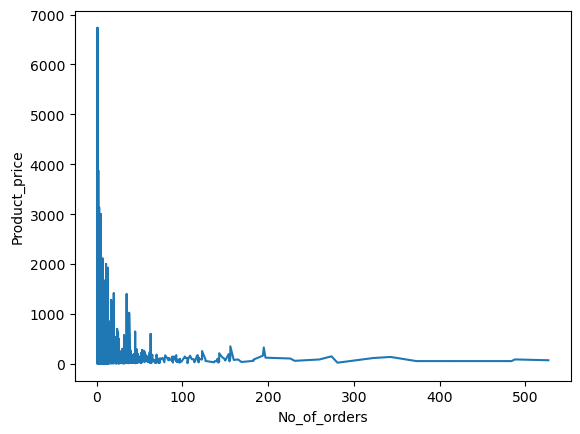

In [19]:
plt.plot(result["No_of_orders"],result["Product_price"])
plt.xlabel("No_of_orders")
plt.ylabel("Product_price")
plt.show()

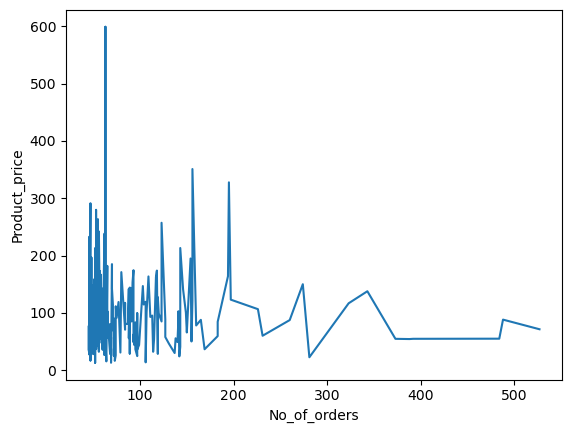

In [20]:
plt.plot(result["No_of_orders"].iloc[:200],result["Product_price"].iloc[:200])
plt.xlabel("No_of_orders")
plt.ylabel("Product_price")
plt.show()

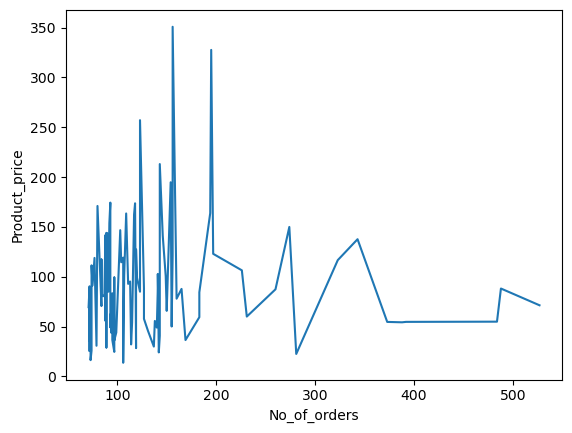

In [21]:
plt.plot(result["No_of_orders"].iloc[:100],result["Product_price"].iloc[:100])
plt.xlabel("No_of_orders")
plt.ylabel("Product_price")
plt.show()

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [23]:
query=''' select order_id,count(seller_id) diff_seller
from  order_items group by order_id having diff_seller>1
'''
cursor.execute(query)
data=cursor.fetchall()
data

[('0008288aa423d2a3f00fcb17cd7d8719', 2),
 ('00143d0f86d6fbd9f9b38ab440ac16f5', 3),
 ('001ab0a7578dd66cd4b0a71f5b6e1e41', 3),
 ('001d8f0e34a38c37f7dba2a37d4eba8b', 2),
 ('002c9def9c9b951b1bec6d50753c9891', 2),
 ('002f98c0f7efd42638ed6100ca699b42', 2),
 ('003324c70b19a16798817b2b3640e721', 2),
 ('00337fe25a3780b3424d9ad7c5a4b35e', 2),
 ('003822434f91204da0a51fe4cf2aba18', 2),
 ('003f201cdd39cdd59b6447cff2195456', 2),
 ('005059edee63c8c708ba61910793b31b', 2),
 ('00526a9d4ebde463baee25f386963ddc', 4),
 ('00571ded73b3c061925584feab0db425', 2),
 ('005d9a5423d47281ac463a968b3936fb', 3),
 ('0068c109948b9a1dfb8530d1978acef3', 2),
 ('008d9bf350ff02ed444b3452cf3f57e0', 2),
 ('00946f674d880be1f188abc10ad7cf46', 2),
 ('0097f0545a302aafa32782f1734ff71c', 2),
 ('009905140e9f8cc35d5be897937381db', 2),
 ('00a57dfbb049fbaae10763e2cf15f797', 3),
 ('00b1861aeb89afa498404c684148a619', 2),
 ('00b6e66f005a657a6b13eedcacdf9342', 2),
 ('00bcee890eba57a9767c7b5ca12d3a1b', 4),
 ('00c00d5b36157595e21108ba1da2828

Above query explains that within one order there can be multiple sellers

In [27]:
query=''' Select * ,dense_rank() over(order by total_revenue desc) from (select seller_id,sum(price) total_revenue
from  order_items group by seller_id )a
'''
cursor.execute(query)
data=cursor.fetchall()
result=pd.DataFrame(data,columns=["seller_id","total_revenue","rank"])
result.head()                

,seller_id,total_revenue,rank
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.628349,1
1,53243585a1d6dc2643021fd1853d8905,222776.049545,2
2,4a3ca9315b744ce9f8e9374361493884,200472.921459,3
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.029396,4
4,7c67e1448b00f6e969d365cea6b010ab,187923.891939,5


# Calculate the moving average of order values for each customer over their order history

In [34]:
query=''' Select customer_id,order_purchase_timestamp ,payment_value,avg(payment_value) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as moving_average from
(Select orders.order_id,orders.customer_id,orders.order_purchase_timestamp,payments.payment_value
from orders join payments on orders.order_id=payments.order_id order by customer_id )a
'''
cursor.execute(query)
data=cursor.fetchall()
    

In [39]:
result=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment_value","moving_average"])
result.tail(200) 

,customer_id,order_purchase_timestamp,payment_value,moving_average
103686,ff869205a42a4de9aa4a4bc357c62507,2018-02-07 19:01:39,108.00,108.000000
103687,ff87e254d164dee48c4db2b4ec462684,2017-11-16 12:15:20,79.17,79.169998
103688,ff886777efd58cd30781969d96dfe558,2018-05-02 20:32:30,64.03,64.029999
103689,ff88c3fe67d72e79283259628c0731e1,2018-01-18 13:37:27,172.65,172.649994
103690,ff88f2ccc66b4c9c2c0256274f51b4b0,2018-02-24 12:50:07,168.61,168.610001
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

In [45]:
query=''' select * , sum(payment) over(partition by year order by year ,months) from (Select year(orders.order_purchase_timestamp) as year,month(orders.order_purchase_timestamp) as months,round(sum(payments.payment_value),2) 
as payment
from orders join payments on orders.order_id=payments.order_id 
group by year,months order by year ,months) as a
'''
cursor.execute(query)
data=cursor.fetchall()
data

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.340000000004),
 (2017, 1, 138488.04, 138488.04),
 (2017, 2, 291908.01, 430396.05000000005),
 (2017, 3, 449863.6, 880259.65),
 (2017, 4, 417788.03, 1298047.6800000002),
 (2017, 5, 592918.82, 1890966.5),
 (2017, 6, 511276.38, 2402242.88),
 (2017, 7, 592382.92, 2994625.8),
 (2017, 8, 674396.32, 3669022.1199999996),
 (2017, 9, 727762.45, 4396784.569999999),
 (2017, 10, 779677.88, 5176462.449999999),
 (2017, 11, 1194882.8, 6371345.249999999),
 (2017, 12, 878401.48, 7249746.729999999),
 (2018, 1, 1115004.18, 1115004.18),
 (2018, 2, 992463.34, 2107467.52),
 (2018, 3, 1159652.12, 3267119.64),
 (2018, 4, 1160785.48, 4427905.12),
 (2018, 5, 1153982.15, 5581887.27),
 (2018, 6, 1023880.5, 6605767.77),
 (2018, 7, 1066540.75, 7672308.52),
 (2018, 8, 1022425.32, 8694733.84),
 (2018, 9, 4439.54, 8699173.379999999),
 (2018, 10, 589.67, 8699763.049999999)]

In [47]:
result=pd.DataFrame(data,columns=["year","month","payment","cumulative_payment"])
result.head(10)
                

,year,month,payment,cumulative_payment
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,430396.05
5,2017,3,449863.60,880259.65
6,2017,4,417788.03,1298047.68
7,2017,5,592918.82,1890966.50
8,2017,6,511276.38,2402242.88
9,2017,7,592382.92,2994625.80


In [53]:
result=result.drop_duplicates(subset="year",keep="last")
result.head()

,year,month,payment,cumulative_payment
2,2016,12,19.62,59362.34
14,2017,12,878401.48,7249746.73
24,2018,10,589.67,8699763.05


#  Calculate the year-over-year growth rate of total sales.

In [60]:
query=''' select year,payment,(payment-prev_year)/prev_year as growth from  (select year, payment ,lag(payment,1) over( order by year ) as prev_year from (Select year(orders.order_purchase_timestamp) as year,
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id=payments.order_id 
group by year order by year ) as a) as b
'''
cursor.execute(query)
data=cursor.fetchall()
data

[(2016, 59362.34, None),
 (2017, 7249746.73, 121.12703761340946),
 (2018, 8699763.05, 0.2000092381158259)]

In [62]:
result=pd.DataFrame(data,columns=["year","Current-year-payment","year-over-year growth"])
result.head()

,year,Current-year-payment,year-over-year growth
0,2016,59362.34,NaN
1,2017,7249746.73,121.127038
2,2018,8699763.05,0.200009


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [70]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 18 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id
"""

cursor.execute(query)
data = cursor.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year

In [72]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cursor.execute(query)
data = cursor.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]